# Predicción de podios en la Formula 1

En este proyecto vamos a analizar datos de la fórmula 1 para poder predecir si un piloto tendrá podio, es decir si queda en entre los primeros 3 lugares.

El enfoque se dará de los periodos 2019 - 2021 y 2022 - 2024 ya que los reglamentos se han modificado y queremos analizar si estos tienen un impacto en las variables a estudiar

## ¿Cómo es una carrera de Fórmula 1?

Para familiarizarnos con las bases de datos y sus variables, veamos en qué consiste una carrera de fórmula 1

Cada año (*temporada*), se realizan distintas carreras al rededor del mundo (*rounds*) donde compiten equipos (*constructores*) con dos pilotos (*drivers*), con el objetivo de sumar los suficientes puntos para ganar los campenatos: constructores y pilotos

Cada carrera (*race*) se compone de:
* Tres prácticas libres (*fp*), donde los equipos y pilotos tienen una hora (cada día) para poner a prueba sus autos y tácticas encaminadas a la carrera

* *Qualifications* para determinar el la posición (*position*) en la 'parrilla' (*grid*). El mejor tiempo saldrá desde la posición 1

    * Una Qualy se divide en 3: Q
    * Q1 donde compiten todos los equipos y se eliminan 5 pilotos;
    * Q2 se eliminan 5 pilotos;
    * Q3 los 10 pilotos restantes compiten para obtener el mejor tiempo

El piloto que obtenga la posición 1 en la Q3 se lleva la "pole position"

* La carrera; se compite por los puntos (los primeros diez sólo obtienen) que suman tanto para el campeonanto de construcutores y de pilotos. Cada circuito tiene una distancia y eso determina el número de vueltas (*laps*) a realizar

Teniendo contexto del funcionamiento, pasemos a describir las variables

## Descripción de las variables

* Base `circuits`

    * `circuitId`: identificador único para cada circuito
    * `alt`: Altitud del circuito

* Base `drivers`

    * `driverId`: identificador único para cada piloto
    * `driverRef`: nombre más usado por cada piloto
    * `dob`: fecha de nacimiento
    * `nationality`: nacionalidad del piloto

* base `lap_times`
    * `lap`: número de lap en el circuito
    * `position`: historial de posición en la carrera
    * `time`: tiempo en completar la vuelta
    * `milliseconds`: tiempo en completar una vuelta. 60,000ms + segundos en ms

* base `pit_stops`
    * `stop`: número de pits realizados
    * `lap`: en que lap se dió el pit
    * `duration`: tiempo en completar el pit
    * `milliseconds`: tiempo en completar el pit en millisegundos

* base `qualifying`
    * `number`: número del piloto
    * `position`: posición resultante en la Q
    * `q1`, `q2`, `q3`: tiempo de la vuelta en las Q's

* Base `races`
    * `raceId`: Identificador único para cada carrera. Los posibles valores son de 900 a 1144
    * `year`: Año de la carrera
    * `circuitId`: identificador único de la carrera

* Base `results`:
    * `grid`: posición de cada piloto al inicio de la carrera (resultado de las Q's)
    * `position`: posición final del piloto en la carrera
    * `laps`: cantidad de vueltas que cada piloto realizó en una carrera
    * `time`: cantidad de tiempo en completar la carrera
    * `fastestlap`: número de vuelta donde cada piloto realizó su vuelta más rápida
    * `fastestLapTime`: tiempo de la vuelta más rápida del piloto
    * `fastestLapSpeed`: velocidad máxima a la que el piloto llegó en su vuelta más rápida
    * `statusId`: indica si finalizó o no la carrera y por qué


    ## Objetivo del análisis

    Con la información de las variables

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Nuestra base principal será races y sólo filtramos las carreras a partir de 2019

races = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/races.csv', index_col='raceId')

races_2019_2024 = races[races['year'] >= 2019]
# extrayendo variables de interés
races_2019_2024 = races_2019_2024[['year', 'circuitId']]

In [3]:
races_2019_2024

,year,circuitId
raceId,,
1010,2019,1
1011,2019,3
1012,2019,17
1013,2019,73
1014,2019,4
...,...,...
1140,2024,32
1141,2024,18
1142,2024,80


In [4]:
# qualifying datos
qualifying = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/qualifying.csv', index_col='raceId')

qualifying_2019_2024 = races_2019_2024.join(qualifying, on='raceId')

qualifying_2019_2024 = qualifying_2019_2024.drop(['year', 'circuitId', 'constructorId', 'number'], axis=1)

In [5]:
# attempt to merge
qualifying_2019_2024 = races_2019_2024.merge(qualifying_2019_2024, on='raceId')


In [6]:
qualifying_2019_2024

,year,circuitId,qualifyId,driverId,position,q1,q2,q3
raceId,,,,,,,,
1010,2019,1,7960,1,1,1:22.043,1:21.014,1:20.486
1010,2019,1,7961,822,2,1:22.367,1:21.193,1:20.598
1010,2019,1,7962,20,3,1:22.885,1:21.912,1:21.190
1010,2019,1,7963,830,4,1:22.876,1:21.678,1:21.320
1010,2019,1,7964,844,5,1:22.017,1:21.739,1:21.442
...,...,...,...,...,...,...,...,...
1144,2024,24,10547,848,16,1:23.821,\N,\N
1144,2024,24,10548,855,17,1:23.880,\N,\N
1144,2024,24,10549,1,18,1:23.887,\N,\N


In [7]:
# cambiando nombre a pilotos

drivers = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/drivers.csv')

names = drivers.set_index('driverId')['surname'].to_dict()

qualifying_2019_2024['driverId'] = qualifying_2019_2024['driverId'].map(names)


In [8]:
qualifying_2019_2024

,year,circuitId,qualifyId,driverId,position,q1,q2,q3
raceId,,,,,,,,
1010,2019,1,7960,Hamilton,1,1:22.043,1:21.014,1:20.486
1010,2019,1,7961,Bottas,2,1:22.367,1:21.193,1:20.598
1010,2019,1,7962,Vettel,3,1:22.885,1:21.912,1:21.190
1010,2019,1,7963,Verstappen,4,1:22.876,1:21.678,1:21.320
1010,2019,1,7964,Leclerc,5,1:22.017,1:21.739,1:21.442
...,...,...,...,...,...,...,...,...
1144,2024,24,10547,Albon,16,1:23.821,\N,\N
1144,2024,24,10548,Zhou,17,1:23.880,\N,\N
1144,2024,24,10549,Hamilton,18,1:23.887,\N,\N


In [9]:
# pit stops en las carreras
pits = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/pit_stops.csv', index_col='raceId')

pits_2019_2024 = races_2019_2024.join(pits, on='raceId')

pits_2019_2024  = pits_2019_2024 .drop(['time', 'year', 'circuitId'], axis=1)

In [10]:
pits_2019_2024 = races_2019_2024.merge(pits_2019_2024, on='raceId')

In [11]:
# lap_times en cada carrera
lap_times = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/lap_times.csv', parse_dates=True)
lap_times_2014_2024 = lap_times[(lap_times['raceId'] >= 900) & (lap_times['raceId'] <= 1144)]
lap_times_2014_2024 = lap_times_2014_2024.set_index(['raceId', 'driverId'])


In [12]:
lap_times_2014_2024.loc[(900)]

,lap,position,time,milliseconds
driverId,,,,
3,1,1,1:42.038,102038
3,2,1,1:37.687,97687
3,3,1,1:35.765,95765
3,4,1,1:34.939,94939
3,5,1,1:35.438,95438
...,...,...,...,...
16,52,12,1:34.934,94934
16,53,12,1:34.626,94626
16,54,12,1:34.594,94594


In [13]:
# Resultados de cada carrera
results = pd.read_csv('/var/home/diegob/Documents/multivariate_analysis/project/f1_data/results.csv', index_col='raceId').drop(['constructorId', 'number', 'positionText', 'rank'], axis=1)

results = races_2019_2024.join(results, on='raceId')

In [14]:
results

,year,circuitId,resultId,driverId,grid,position,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId
raceId,,,,,,,,,,,,,,,
1010,2019,1,24203,822,2,1,1,26.0,58,1:25:27.325,5127325,57,1:25.580,223.075,1
1010,2019,1,24204,1,1,2,2,18.0,58,+20.886,5148211,57,1:26.057,221.839,1
1010,2019,1,24205,830,4,3,3,15.0,58,+22.520,5149845,57,1:26.256,221.327,1
1010,2019,1,24206,20,3,4,4,12.0,58,+57.109,5184434,16,1:27.954,217.054,1
1010,2019,1,24207,844,5,5,5,10.0,58,+58.203,5185528,58,1:26.926,219.621,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2024,24,26760,825,14,16,16,0.0,57,\N,\N,57,1:25.637,222.002,11
1144,2024,24,26761,859,12,17,17,0.0,55,\N,\N,52,1:28.751,214.212,5
1144,2024,24,26762,822,9,\N,18,0.0,30,\N,\N,14,1:29.482,212.462,130


# Analisis Exploratorio de Datos

In [15]:
qualifying_2019_2024['position'].describe()

count    2556.000000
mean       10.485524
std         5.760261
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: position, dtype: float64

In [16]:
pits_2019_2024[['stop', 'lap']].describe()

,stop,lap
count,4584.000000,4584.000000
mean,1.775305,26.172120
std,2.117772,15.731389
min,1.000000,1.000000
25%,1.000000,13.000000
50%,1.000000,26.000000
75%,2.000000,37.000000
max,70.000000,78.000000


In [19]:
results[['grid', 'points', 'laps']].describe()

,grid,points,laps
count,2559.000000,2559.000000,2559.000000
mean,10.000000,5.076397,54.776084
std,5.826458,7.229723,17.142218
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,51.000000
50%,10.000000,0.500000,57.000000
75%,15.000000,9.000000,68.000000
max,20.000000,26.000000,87.000000


Distribución de las Pole positions de 2019 a 2024

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Hamilton'),
  Text(1, 0, 'Leclerc'),
  Text(2, 0, 'Magnussen'),
  Text(3, 0, 'Norris'),
  Text(4, 0, 'Pérez'),
  Text(5, 0, 'Russell'),
  Text(6, 0, 'Sainz'),
  Text(7, 0, 'Verstappen')])

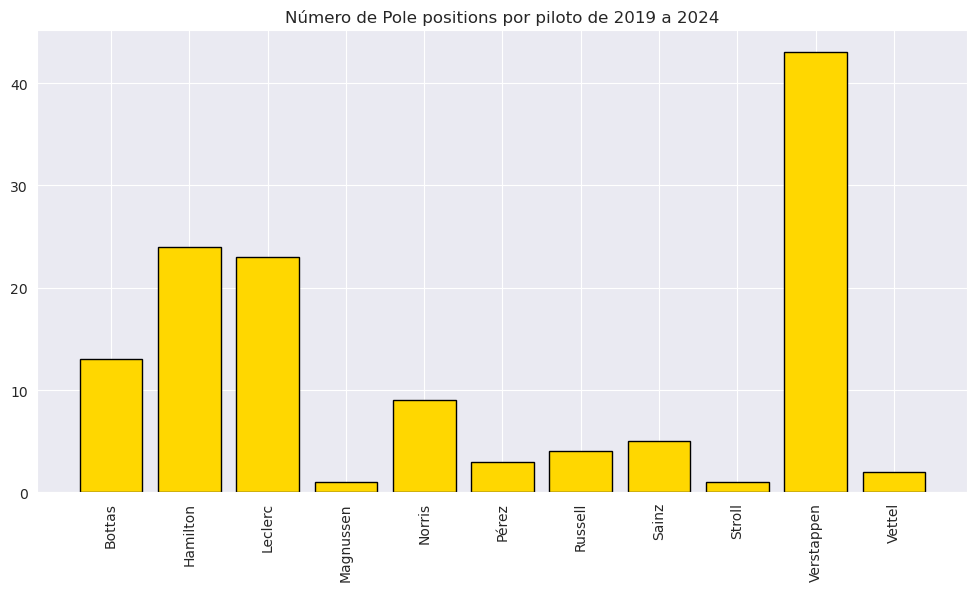

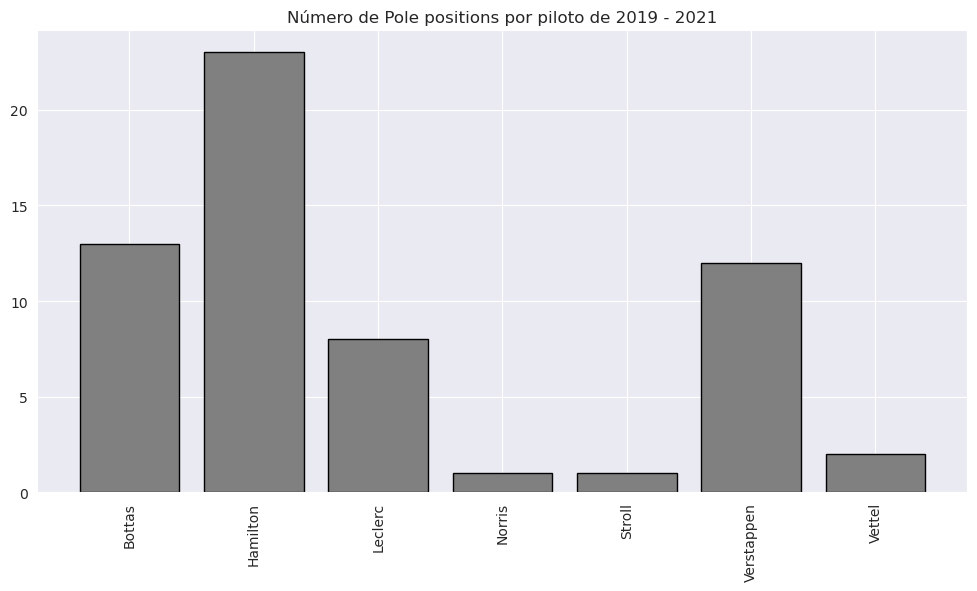

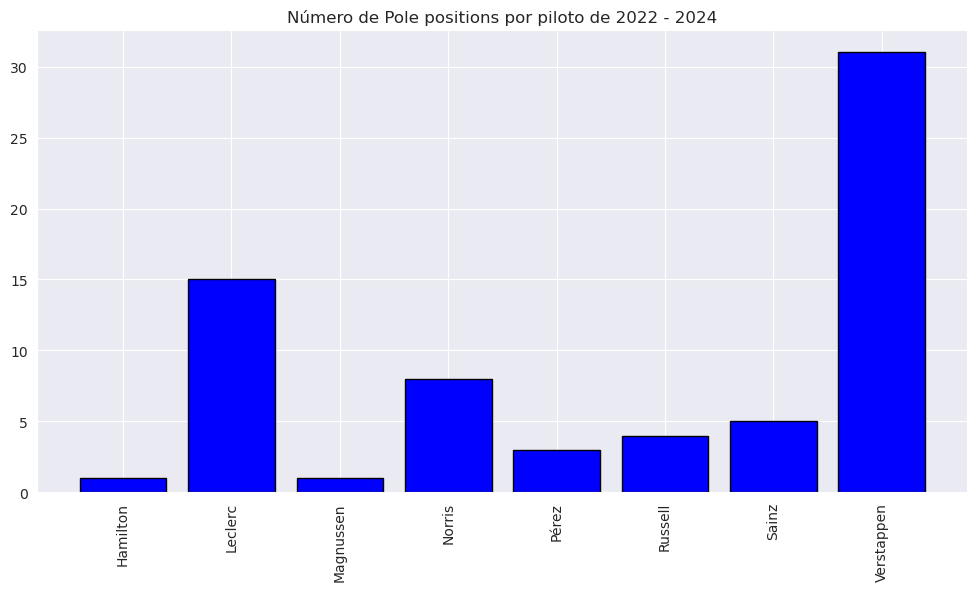

In [18]:
# making some plots
# contando las pole positions 2019 a 2024
pole_positions = qualifying_2019_2024.where(qualifying_2019_2024['position'] == 1).dropna()

pole_counts = pole_positions.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts["driverId"],
    pole_counts["count"],
    color="gold",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2019 a 2024")
plt.xticks(rotation=90)


# pole position de 2019 - 2021 y 2022-2024
pole_positions_2019_2021 = qualifying_2019_2024.where((qualifying_2019_2024['position'] == 1) & (qualifying_2019_2024['year'] <= 2021)).dropna()
pole_counts_2019_2021 = pole_positions_2019_2021.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts_2019_2021["driverId"],
    pole_counts_2019_2021["count"],
    color="gray",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2019 - 2021")
plt.xticks(rotation=90)

pole_positions_2022_2024 = qualifying_2019_2024.where((qualifying_2019_2024['position'] == 1) & (qualifying_2019_2024['year'] > 2021)).dropna()
pole_counts_2022_2024 = pole_positions_2022_2024.groupby('driverId').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(
    pole_counts_2022_2024["driverId"],
    pole_counts_2022_2024["count"],
    color="blue",
    edgecolor="black"
)
plt.title("Número de Pole positions por piloto de 2022 - 2024")
plt.xticks(rotation=90)


¿Cuál es el tiempo promedio de los pilotos por circuito?

/tmp/ipykernel_6659/1650484000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["time_seconds"] = results["time"].apply(convertir_tiempo)


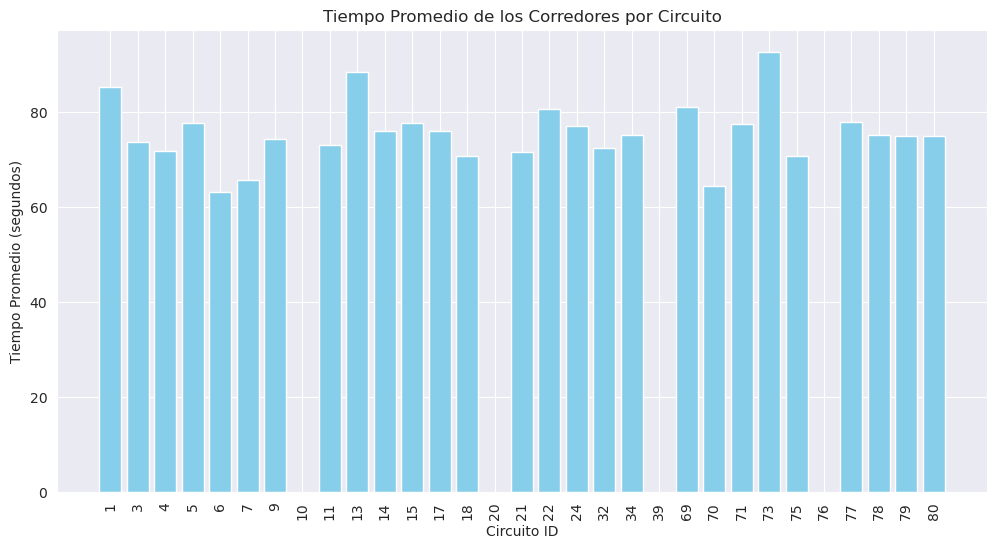

In [22]:
#convertr tiempo en segundos
def convertir_tiempo(time):
    if isinstance(time, str) and ":" in time:
        partes = time.split(":")
        if len(partes) == 2:  # Formato mm:ss.SSS
            minutos = int(partes[0])
            segundos = float(partes[1])
            return minutos * 60 + segundos
    return None  # Si hay valores \N o NaN

# Aplicar la conversión a la columna 'time'
results["time_seconds"] = results["time"].apply(convertir_tiempo)

time_mean = results.groupby("circuitId")["time_seconds"].mean().reset_index()

import matplotlib.pyplot as plt

# Ordenar los datos por tiempo promedio
time_mean = time_mean.sort_values(by="circuitId", ascending=True)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(time_mean["circuitId"].astype(str), time_mean["time_seconds"], color="skyblue")

# Etiquetas y título
plt.xlabel("Circuito ID")
plt.ylabel("Tiempo Promedio (segundos)")
plt.title("Tiempo Promedio de los Corredores por Circuito")
plt.xticks(rotation=90)

plt.show()

El circuito 73 tiene el promedio mas lento de tiempo en recorrido por los conductores.

¿Qué pilotos han pasado más veces en la Q3?

/tmp/ipykernel_6659/1902580314.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pilotos["driverId"].astype(str), y=top_pilotos["veces_en_Q3"], palette="mako")


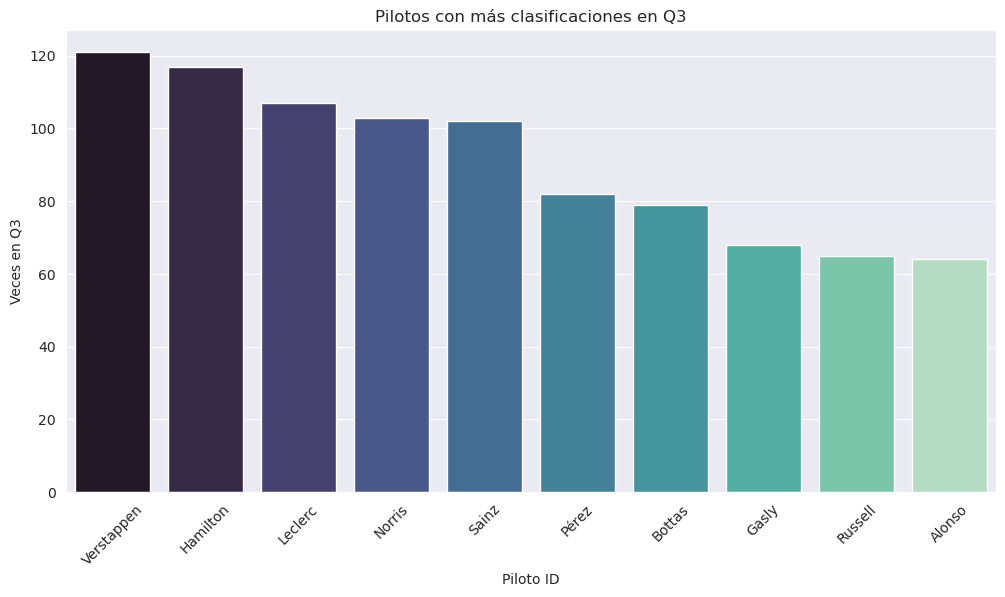

In [23]:
# Filtrar pilotos que estuvieron en Q3 (posiciones de salida del 1 al 10)
pilotos_q3 = qualifying_2019_2024[qualifying_2019_2024["q3"] != "\\N"]

# Contar cuántas veces ha estado cada piloto en Q3
pilotos_q3 = pilotos_q3["driverId"].value_counts().reset_index()

pilotos_q3.columns = ["driverId", "veces_en_Q3"]

#Grafico
top_pilotos = pilotos_q3.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pilotos["driverId"].astype(str), y=top_pilotos["veces_en_Q3"], palette="mako")

plt.xlabel("Piloto ID")
plt.ylabel("Veces en Q3")
plt.title("Pilotos con más clasificaciones en Q3")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario

plt.show()


**Cuestiones para reponder más adelante**

¿Hay alguna relación entre el máximo tiempo obtenido en las Qualifications y el de las carreras?
Ejemplo si Pérez obtuvo un tiempo maximo en Q's de 1.48.2, es posible que haya mejoras?

¿Cuál es el posición promedio en el grid de cada piloto?

¿En qué lap se dió la vuelta rápida por circuito y quién la obtuvo?

¿Hay una relación entre velocidad máxima y circuito (altitud)?

¿En que lap es más probable que se haga el primer pit, según el circuito?

## Heat map

vamos a encofocarnos en la tabla de resultados y analizar la correlación de las variables, más adelante combinaremos las otras bases. Queremos dar una primera exploración

/tmp/ipykernel_6659/795545546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results[col] = pd.to_numeric(results[col], errors='coerce')  # Convert to numeric, replace non-numeric with NaN


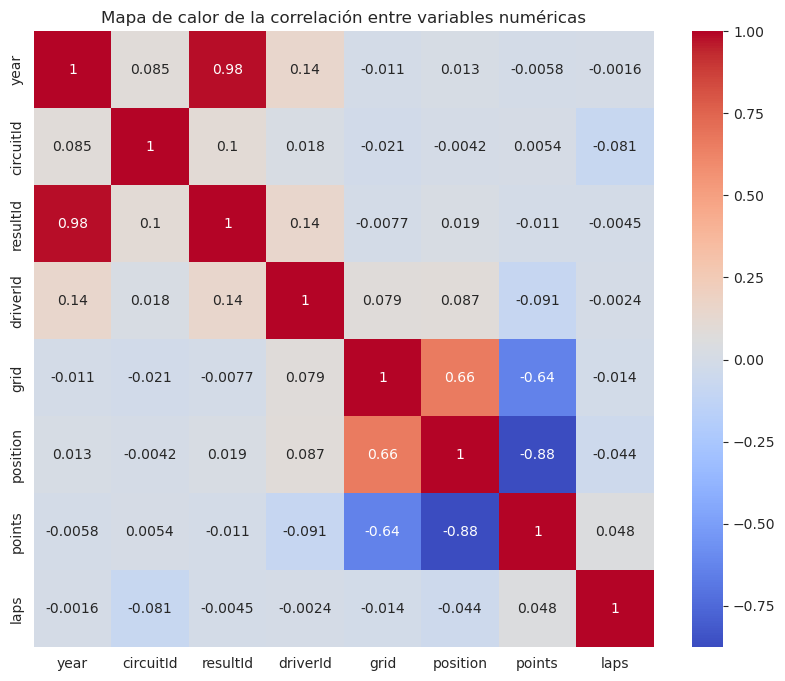

In [24]:
numerical_vars = ['year','circuitId', 'resultId', 'driverId','grid','position','points', 'laps']
for col in numerical_vars:
    results[col] = pd.to_numeric(results[col], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
results = results.dropna(subset=numerical_vars)


correlation_matrix = results[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

### PCA

realizamos un analisis de componentes principales sólo de la base de resultados, para identificar variables con más peso dentro de la carrera

In [20]:
# Reemplazar los datos \\N por 0
results.replace("\\N", 0, inplace=True)
results.drop(columns=["time_seconds"], inplace=True)

results

KeyError: "['time_seconds'] not found in axis"